In [464]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [465]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [466]:
len(words)

32033

In [467]:
# build the vocabulary of characters and mappings to / from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [468]:
# build the dataset

block_size = 3 # context lenght: how many characters do we take to predict the next one?
x, y = [], []

for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    x.append(context)
    y.append(ix)
    # print(''.join(itos[i] for i in context), '------>', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(x)
Y = torch.tensor(y)

In [469]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [470]:
# x

In [471]:
# y

In [472]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


### Implementing the embedding lookup table

In [473]:
C = torch.randn((27, 2))
C

tensor([[ 0.0968, -0.3108],
        [ 0.6946, -0.6150],
        [ 0.6677, -1.8881],
        [-0.0924,  1.6080],
        [-0.5931,  0.4912],
        [ 0.3170, -2.0966],
        [ 0.4347,  1.1621],
        [-0.9537,  0.7285],
        [ 0.2372,  0.7850],
        [ 1.3407, -1.4926],
        [ 0.5862, -1.4437],
        [-0.1896, -1.0434],
        [ 0.8260, -0.0713],
        [-0.3628,  0.2965],
        [ 0.4213,  0.7135],
        [-0.7938, -0.8434],
        [ 0.7726, -1.6763],
        [ 0.4780,  0.2459],
        [-0.0337,  0.0209],
        [ 1.7758, -0.9574],
        [ 0.3518, -0.1762],
        [ 0.1535, -0.1642],
        [-0.5517, -0.1133],
        [ 0.2999, -1.1611],
        [-0.1617, -0.8706],
        [-0.7163, -0.0346],
        [-0.3853,  0.9025]])

In [474]:
# C[5]

In [475]:
# we are going to discard this as the result of the below and just looking at the index is exactly the same because this layer doesn't have non-linearity, they are just linear neurons and theirs weight matrix is C

# F.one_hot(torch.tensor(5), num_classes=27).float() @ C

In [476]:
emb = C[x] 
# emb

In [477]:
# C[x] [13,2]

In [478]:
# C[1]

### Implementing Hidden layer

In [479]:
emb.shape

torch.Size([228146, 3, 2])

In [480]:
w1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [481]:
# Take Broadcasting into cosideration 

h = torch.tanh(emb.view(-1, 6) @ w1 + b1)

In [482]:
h.shape

torch.Size([228146, 100])

In [483]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

In [484]:
# below is the inefficient way as this approach creates new memory to perform the operation

# torch.cat(torch.unbind(emb, 1), 1).shape

In [485]:
# a = torch.arange(18)
# a

In [486]:
# a.shape

In [487]:
# a.view(3, 3, 2)

In [488]:
# a.storage()

In [489]:
# emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

### Implementing Output layer

In [574]:
w2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [575]:
logits = h @ w2 + b2

RuntimeError: mat1 and mat2 shapes cannot be multiplied (22655x200 and 100x27)

In [576]:
logits.shape

torch.Size([22655, 27])

In [577]:
# logits

In [578]:
counts = logits.exp()

In [579]:
prob = counts / counts.sum(1, keepdim=True)

In [580]:
prob.shape

torch.Size([22655, 27])

In [581]:
# loss = -prob[torch.arange(32), Y].log().mean()
# loss

In [582]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [583]:
prob[0].sum()

tensor(1.0000, grad_fn=<SumBackward0>)

In [584]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [585]:
# ======================== now made respectable ============================================

In [586]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [587]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
w1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
w2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, w1, b1, w2, b2]

In [588]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [589]:
for p in parameters:
  p.requires_grad = True

In [590]:
# learning rate 

lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# lrs

In [591]:
# lri = []
# lossi = []
# stepi = []

# for i in range(30000):
#   # minibatch construct 
#   ix = torch.randint(0, Xtr.shape[0], (32,))

#   # forward pass
#   emb = C[Xtr[ix]] # (32, 2, 2)
#   h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # (32, 100)
#   logits = h @ w2 + b2 # (32, 27)
#   # counts = logits.exp()
#   # prob = counts / counts.sum(1, keepdim=True)
#   # loss = -prob[torch.arange(32), Y].log().mean()
#   loss = F.cross_entropy(logits, Ytr[ix])
#   # backward pass
#   for p in parameters:
#     p.grad = None
#   loss.backward()
#   # update
#   # lr = lrs[i]
#   lr = 0.1
#   for p in parameters:
#     p.data += -lr * p.grad
#   # track stats
#   # lri.append(lre[i])
#   stepi.append(1)
#   lossi.append(loss.item())

# print(loss.item())

In [592]:
lri = []
lossi = []
stepi = []

In [593]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ w1 + b1) # (32, 200)
  logits = h @ w2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())


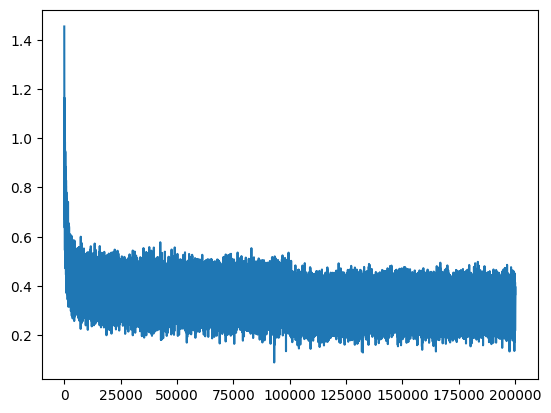

In [594]:
plt.plot(stepi, lossi)

In [595]:
print(loss.item())

2.3255584239959717


In [596]:
# plt.plot(lri, lossi)

In [597]:
logits.max(1)

torch.return_types.max(
values=tensor([ 8.8584,  9.5750,  9.3317,  5.0576,  7.1846, 11.6782,  8.1601,  9.2434,
        11.4594, -1.1465, -1.1465,  2.3364,  1.7811,  9.6089, 11.1670,  2.0160,
        12.3791, 10.4528, 10.7719,  8.7985,  8.4347, -1.1465,  7.8419,  2.3364,
        10.7129,  1.8860,  6.6908,  3.3747,  6.4731, 10.1353,  0.9841,  3.3747],
       grad_fn=<MaxBackward0>),
indices=tensor([ 3, 18, 12,  9,  0,  0,  9,  9,  1,  1,  1, 25,  1,  1,  9, 18,  0,  0,
         0,  0, 12,  1,  1, 25, 14,  1, 12,  1, 14,  9, 12,  1]))

In [598]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [599]:
torch.randint(0, X.shape[0], (32,))

tensor([ 98884, 136155, 127142, 196253,  33233, 156097, 223491, 149998,  88039,
        145991, 104336, 107421, 142170, 170512, 209743, 179416,  95280, 206762,
         28711,  88532,  74563, 225900, 154422,  84981, 199435, 136889,   7978,
         66091, 115394,  67564, 215826,  58901])

In [600]:
# training phase

emb = C[Xdev] # (32, 2, 2)
h = torch.tanh(emb.view(-1, 30) @ w1 + b1) # (32, 100)
logits = h @ w2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss  

tensor(2.1683, grad_fn=<NllLossBackward0>)

In [601]:
# evaluation phase

emb = C[Xdev] # (32, 2, 2)
h = torch.tanh(emb.view(-1, 30) @ w1 + b1) # (32, 100)
logits = h @ w2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss  

tensor(2.1683, grad_fn=<NllLossBackward0>)

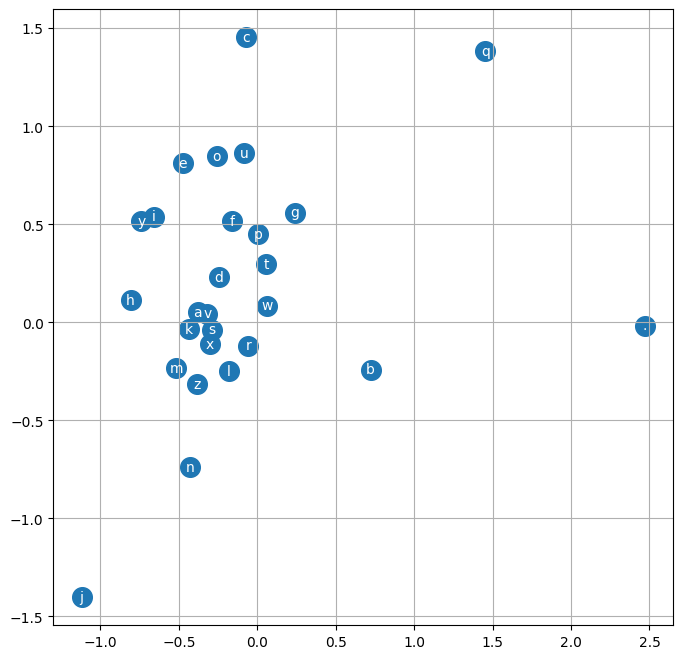

In [602]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [603]:
# training split, dev / validation split, test split
# 80%, 10%, 10%